<a href="https://colab.research.google.com/github/ssarkar551/Pothole-Detection-using-deep-learning/blob/main/Potholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ssarkar551","key":"b51d92de922ae194e028d7166f8c2739"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d atulyakumar98/pothole-detection-dataset

 99% 192M/194M [00:02<00:00, 110MB/s] 
100% 194M/194M [00:02<00:00, 91.5MB/s]


In [ ]:
local_zip="/content/pothole-detection-dataset.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
os.mkdir("/content/train")

In [ ]:
!cp normal ~/.train
!chmod 600 ~/.train/normal

cp: -r not specified; omitting directory 'normal'
chmod: cannot access '/root/.train/normal': No such file or directory


In [ ]:
train_normal_dir="/content/normal"
train_pothole_dir="/content/potholes"

In [ ]:
import shutil
shutil.move("/content/normal","/content/train")

'/content/train/normal'

In [ ]:
shutil.move("/content/potholes","/content/train")

'/content/train/potholes'

In [ ]:
pothole_name=os.listdir("/content/train/potholes")
normal_name=os.listdir("/content/train/normal")
train_dir="/content/train"

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  class_mode='binary',
                                                  batch_size=20,
                                                  shuffle=True)

Found 681 images belonging to 2 classes.


In [ ]:
history=model.fit_generator(generator=train_generator,
                            steps_per_epoch=100,
                            epochs=25,
                            verbose=2)

Epoch 1/25
100/100 - 47s - loss: 0.6778 - acc: 0.6999
Epoch 2/25
100/100 - 44s - loss: 0.3933 - acc: 0.8271
Epoch 3/25
100/100 - 47s - loss: 0.3205 - acc: 0.8660
Epoch 4/25
100/100 - 46s - loss: 0.2934 - acc: 0.8737
Epoch 5/25
100/100 - 44s - loss: 0.3043 - acc: 0.8772
Epoch 6/25
100/100 - 46s - loss: 0.3205 - acc: 0.8821
Epoch 7/25
100/100 - 46s - loss: 0.2665 - acc: 0.8986
Epoch 8/25
100/100 - 46s - loss: 0.2460 - acc: 0.8986
Epoch 9/25
100/100 - 47s - loss: 0.2362 - acc: 0.9021
Epoch 10/25
100/100 - 45s - loss: 0.2539 - acc: 0.8940
Epoch 11/25
100/100 - 46s - loss: 0.2178 - acc: 0.9182
Epoch 12/25
100/100 - 46s - loss: 0.2204 - acc: 0.9113
Epoch 13/25
100/100 - 45s - loss: 0.2160 - acc: 0.9182
Epoch 14/25
100/100 - 45s - loss: 0.1856 - acc: 0.9228
Epoch 15/25
100/100 - 44s - loss: 0.1899 - acc: 0.9228
Epoch 16/25
100/100 - 46s - loss: 0.1944 - acc: 0.9238
Epoch 17/25
100/100 - 47s - loss: 0.1769 - acc: 0.9225
Epoch 18/25
100/100 - 46s - loss: 0.1823 - acc: 0.9290
Epoch 19/25
100/100

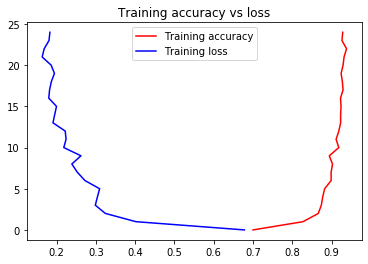

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['acc']
loss=history.history['loss']
epochs=range(len(acc))
plt.plot(acc,epochs,'r',label='Training accuracy')
plt.plot(loss,epochs,'b',label='Training loss')
plt.title("Training accuracy vs loss")
plt.legend()
plt.figure()
plt.show()


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving index.jpeg to index.jpeg
index.jpeg
[[1.]]
